In [1]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading the dataset
num_words = 5000  # Define the number of top frequent words to keep
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
# Creating a function for vectorizing data
def vectorize_sequences(sequences, dimension=num_words):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [4]:
# Vectorizing training and testing data
x_train = vectorize_sequences(X_train)
x_test = vectorize_sequences(X_test)

In [5]:
# Vectorizing labels
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [6]:
# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [7]:
# Creating the DNN Model with dropout layers
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(num_words,)))
model.add(Dropout(0.5))  # Adding dropout with a rate of 0.5
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout with a rate of 0.5
model.add(Dense(1, activation='sigmoid'))

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [9]:
# Print model summary
print("Model Summary:")
print(model.summary())
print("\n")

Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160032    
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 161121 (629.38 KB)
Trainable params: 161121 (629.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
N

In [10]:
# Train the model with early stopping
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.2,  # Use 20% of the training data for validation
                    callbacks=[early_stopping])

Epoch 1/20
40/40 [==============================] - 2s 30ms/step - loss: 0.6218 - acc: 0.6549 - val_loss: 0.4583 - val_acc: 0.8452
Epoch 2/20
40/40 [==============================] - 1s 18ms/step - loss: 0.4304 - acc: 0.8246 - val_loss: 0.3270 - val_acc: 0.8814
Epoch 3/20
40/40 [==============================] - 1s 19ms/step - loss: 0.3275 - acc: 0.8762 - val_loss: 0.2850 - val_acc: 0.8872
Epoch 4/20
40/40 [==============================] - 1s 20ms/step - loss: 0.2685 - acc: 0.9010 - val_loss: 0.2773 - val_acc: 0.8862
Epoch 5/20
40/40 [==============================] - 1s 27ms/step - loss: 0.2313 - acc: 0.9157 - val_loss: 0.2799 - val_acc: 0.8830
Epoch 6/20
40/40 [==============================] - 1s 27ms/step - loss: 0.2104 - acc: 0.9251 - val_loss: 0.2883 - val_acc: 0.8854
Epoch 7/20
40/40 [==============================] - 1s 23ms/step - loss: 0.1836 - acc: 0.9352 - val_loss: 0.3009 - val_acc: 0.8868


In [11]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print("\nTest Loss:", loss)
print("Test Accuracy:", accuracy)

782/782 [==============================] - 2s 2ms/step - loss: 0.2809 - acc: 0.8844

Test Loss: 0.28085294365882874
Test Accuracy: 0.8843600153923035


In [12]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

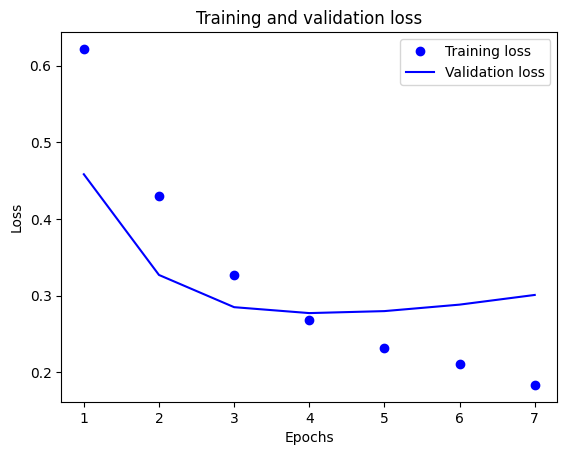

In [13]:
# Plotting model loss
plt.plot(epochs, loss, 'bo', label='Training loss') # "bo" is for "blue dot"
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b is for "solid blue line"
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

<Figure size 640x480 with 0 Axes>

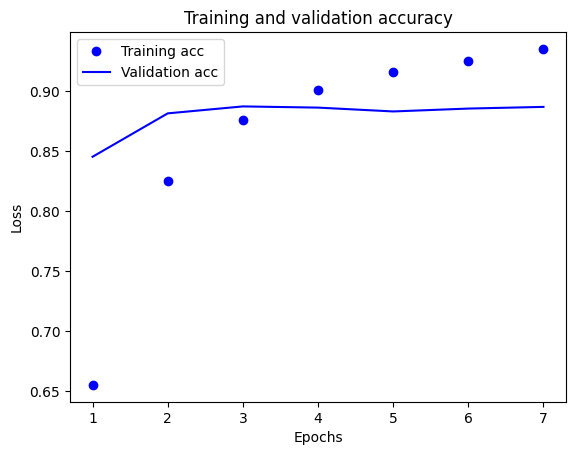

In [15]:
# Plotting model accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

782/782 [==============================] - 3s 4ms/step

Confusion Matrix:
[[11069  1431]
 [ 1460 11040]]


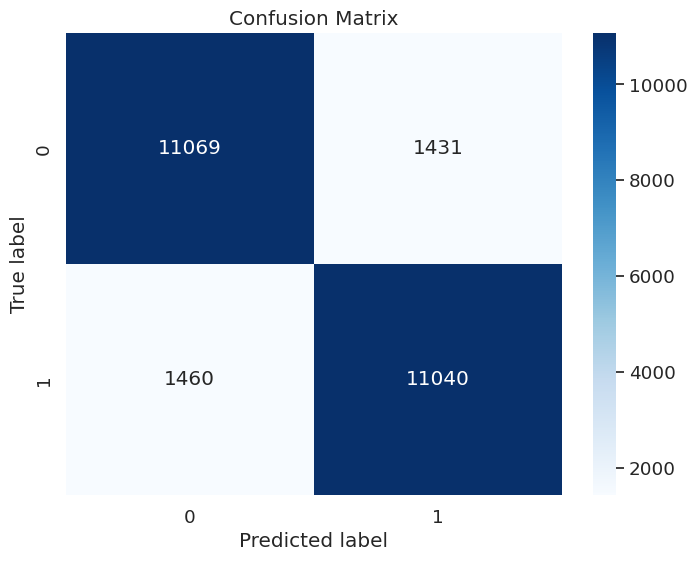

In [16]:
# Predict probabilities
probabilities = model.predict(x_test)

# Convert probabilities to binary predictions
predictions = (probabilities > 0.5).astype('int32')

# Confusion Matrix
conf_mat = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(conf_mat)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()